# K-means聚类
用kmeans对鸢尾花数据进行聚类

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## 加载鸢尾花数据集
The iris dataset is a classic and very easy multi-class classification dataset.

|||
|--|--|
|Classes|3|
|Samples per class|50|
|Samples total|150|
|Dimensionality|4|

In [2]:
sample = load_iris()
data = sample['data']
target = sample['target']

## 可视化
由于鸢尾花数据集的特征维度为4， 为了方便可视化，取前两维的数据来在2维平面上作图。因为直接削减一般的特征，3中鸢尾花在2维平面上分布重合也是在所难免。

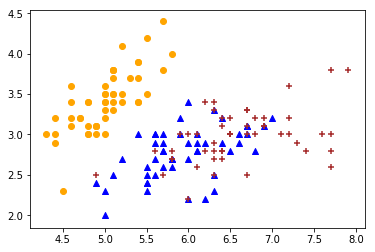

In [3]:
for (i, c, m) in zip(range(3), ['orange', 'blue', 'brown'], ['o', '^', '+']):
    indices = target == i
    plt.scatter(data[indices, 0], data[indices, 1], c=c, marker=m)
plt.show()

## Kmeans
```
创建k个点作为起始中心点（1.经常是随机选择 2.这里的每个点都暂时代表一个簇的中心点 3.中心点不一定与样本点重合）
当任意一个点的簇分配结果发生改变时：
    对样本集中每一个样本：
        对每一个中心点：
            计算样本点到中心点之间的度量
        重新分配样本，将样本分配到最近的中心点所在的簇
    重新计算中心点，对每一个簇，计算簇中所有样本点的均值并将均值作为新的中心点
```

In [4]:
def rand_center(data, k):
    """
    创建初始中心点
    data: 带聚类数据集
    k: 聚类中心点数目
    """
    dims_data = data.shape[1]
    centers = np.mat(np.empty((k, dims_data)))  # 中心点向量
    '''create random cluster centers, 
    within bounds of each dimension'''
    for i in range(dims_data):
        min_ = np.min(data[:, i])
        max_ = np.max(data[:, i])
        centers[:, i] = np.random.rand(k, 1) * (max_ - min_) + min_
    return centers

In [5]:
# 测试rand_center()函数功能
rand_center(data, 2)

matrix([[ 5.86897615,  3.41447679,  2.20802239,  1.39046974],
        [ 6.02503317,  2.39027735,  5.85077734,  2.2073336 ]])

In [6]:
def dist_eclud(a, b):
    """
    用欧式距离度量样本点和中心点之间的距离
    """
    return np.sqrt(np.sum(np.power(a - b, 2)))

In [7]:
def k_means(data, k, dist_meas=dist_eclud, create_cent=rand_center):
    assert len(data.shape) == 2  # 数据集为2维数据
    nums_data = data.shape[0]
    # create mat to assign data points to a centroid, also holds dist of each point
    cluster_assment = np.mat(np.empty((nums_data, 2)))
    centers = create_cent(data, k)

    cluster_changed = True
    while cluster_changed:
        cluster_changed = False
        for i in range(nums_data):
            min_dist = np.inf
            min_center_index = -1
            for j in range(k):  # for each data point assign it to the closest centroid
                dist = dist_meas(data[i], centers[j])
                if dist < min_dist:
                    min_dist = dist
                    min_center_index = j
            if cluster_assment[i, 0] != min_center_index:
                cluster_changed = True
                cluster_assment[i, :] = min_center_index, min_dist
                
        for i in range(k):  # recalculate centroids
            centers[i] = np.mean(data[np.nonzero(cluster_assment[:, 0] == i)[0]], axis=0)
    return np.array(centers), np.array(cluster_assment)

In [8]:
centers, cluster_assment = k_means(data, 3)

In [9]:
print('聚类中心点:\n', centers)
print('\n样本点类别：\n', cluster_assment[:, 0])

聚类中心点:
 [[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]

样本点类别：
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  2.  2.  2.  2.  0.  2.
  2.  2.  2.  2.  2.  0.  0.  2.  2.  2.  2.  0.  2.  0.  2.  0.  2.  2.
  0.  0.  2.  2.  2.  2.  2.  0.  2.  2.  2.  2.  0.  2.  2.  2.  0.  2.
  2.  2.  0.  2.  2.  0.]


### 对聚类后标签的标签进行可视化
可以看到聚类后的标签跟聚类前的标签相近，说明我们自定义的kmeans算法有较好的效果。

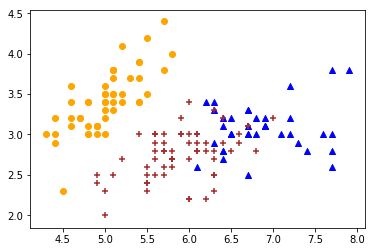

In [10]:
new_target = cluster_assment[:, 0]
for (i, c, m) in zip([1, 2, 0], ['orange', 'blue', 'brown'], ['o', '^', '+']):
    indices = new_target == i
    plt.scatter(data[indices, 0], data[indices, 1], c=c, marker=m)
plt.show()